Vitória Rodrigues Pinto Borelli Figueiredo - RA: 800203

Maurício Gallera de Almeida - RA: 800366

Cauã Benini - RA: 801046

Universidade Federal de São Carlos (UFSCar)

---

# **Trabalho 1 - Aprendizado de Máquina 1**
**Aprendizado Supervisionado**
--

---

## **Introdução**

O objetivo deste projeto consiste na seleção de um conjunto de dados relevante, sobre o qual serão executadas tarefas de classificação a partir de métodos apresentados na disciplina. Serão assim desenvolvidas etapas de escolha dos dados, processamento inicial destes, aplicação dos métodos de aprendizado supervisionado, visualização de resultados e conclusões gerais, todas descritas detalhadamente a seguir. Logo abaixo, encontram-se as importações das bibliotecas utilizadas para o desenvolvimento.


In [ ]:
!pip install xgboost

# bibliotecas necessarias para leitura de dados e visualizacao
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelos usados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metricas de desempenho e processamento em geral
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# ignora warnings
from warnings import filterwarnings
filterwarnings('ignore')


## Seleção do Dataset



Nesta etapa, foi selecionado um conjunto de dados real referente ao censo americano de 1994. Assim, o objetivo do projeto será **predizer se a renda de um adulto excede ou não $50K/ano, baseando-se nos demais dados pessoais colhidos no censo**.

O dataset em questão foi escolhido por se destacar ao oferecer uma rica fonte de informações sobre um tema social de grande relevância. A coleta de dados a partir de um censo garante a abrangência e representatividade da amostra, possibilitando uma análise profunda e abrangente do tema. A combinação da relevância temática com a riqueza dos dados reais abre um leque de possibilidades para a realização de análises e a descoberta de novos conhecimentos.

Os dados podem ser acessados a partir do link: https://archive.ics.uci.edu/dataset/2/adult



In [ ]:
!pip3 install -U ucimlrepo

from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)

In [ ]:
# aspecto geral dos dados
data = adult.data.original
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Estudo e Preparação


Inicialmente, o conjunto de dados será estudado, de forma a selecionar e pré-processar os atributos, permitindo que estes obtenham os melhores resultados possíveis quando aplicados aos modelos. Primeiramente, é feita uma apresentação inicial do que cada atributo representa e como estão organizados.

Os dados são organizados em 15 atributos, havendo um total de 48842 tuplas.


In [ ]:
data.shape

(48842, 15)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Apesar dos nomes autoexplicativos, é válida uma apresentação detalhada de cada um. Assim sendo, temos:

1. **age:** idade
2. **workclass:** categoria de trabalho
3. **fnlwgt:** peso final, estimativa de quão representativa a amostra é em relação à população total
4. **education:** nível de escolaridade
5. **education-num:** nível de escolaridade
6. **marital-status:** estado civil
7. **occupation:** ocupação
8. **relationship:** relacionamento familiar
9. **race:** raça
10. **sex:** sexo
11. **capital-gain:** renda obtida através de investimentos
12. **capital-loss:** renda perdida através de investimentos
13. **hours-per-week:** horas trabalhadas por semana
14. **native-country:** país nativo
15. **income:** renda, atributo alvo


Faz-se necessária uma exploração inicial e pré-processamento dos dos dados, para garantir a qualidade deles e posterior eficiência dos modelos aplicados. Assim, aplica-se os seguintes passos:

1. Visualização dos dados
2. Seleção de atributos
3. Tratamento de tuplas vazias e duplicadas
4. Tratamento e seleção de atributos nominais
5. Tratamento de atributos numéricos
6. Amostragem

### 1. Visualização dos dados

Nesta primeira etapa, será feita a exploração inicial dos dados a partir de métodos visuais, de forma e gerar uma compreensão inicial acerca deles, permitindo que decisões plausíveis sejam tomadas nas etapas seguintes, baseando-se na semântica do conjunto. Tal agrupamento ainda é útil pois determinados valores dentro das distribuições de valores possíveis aparecem em baixa frequência, de modo que faz mais sentido, semanticamente, agrupar tais valores em grupos maiores.

In [ ]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### Visualização da tabela de atributos categóricos

Em uma primeira visualização dos atributos categóricos, nota-se uma grande variedade de valores possíveis para **native-country** e **education**, o que pode ser maléfico para o encontro de padrões dentro dos modelos depois que os valores forem convertidos em numéricos. Por isso, posteriormente, agrupamento desses valores deverão ser feitos. Tal agrupamento ainda é útil pois determinados valores dentro das distribuições de valores possíveis aparecem em baixa frequência, de modo que faz mais sentido, semanticamente, agrupar tais valores em grupos maiores.


In [ ]:
nominal_attributes = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
nominal_data = data[nominal_attributes]

nominal_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [ ]:
for nominal_attribute in nominal_attributes:
  print('quantidade atributos únicos para', nominal_attribute, ':', nominal_data[nominal_attribute].nunique())

quantidade atributos únicos para workclass : 9
quantidade atributos únicos para education : 16
quantidade atributos únicos para marital-status : 7
quantidade atributos únicos para occupation : 15
quantidade atributos únicos para relationship : 6
quantidade atributos únicos para race : 5
quantidade atributos únicos para sex : 2
quantidade atributos únicos para native-country : 42


In [ ]:
for nominal_attribute in nominal_attributes:
  print(nominal_data[nominal_attribute].value_counts())
  print('------------------\n')

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
------------------

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
------------------

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
------------------

occupation
Prof-specialt

#### Visualização de atributos numéricos

Nesta etapa, usou-se o *describe* para ter uma noção geral dos atributos numéricos, o que permitiu notar uma alta variabilidade na distribuição de **fnlwgt**, além de muitas escalas diferentes entre os atributos, o que pode prejudicar o desempenho de modelos e gera a necessidade de posterior normalização dos dados.

In [ ]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Em seguida, foi utilizada a correlação para compreender as relações entre os atributos numéricos. Nota-se, inicialmente, valores pouquíssimo relevantes de correlação entre **income** (atributo alvo) e **fnlwgt**, o que pode indicar pouca utilidade do atributo para posteriores análises. Pode-se também observar que há, mesmo que fraca, certa correlação entre o atributo alvo e os demais atributos numéricos, principalmente **education-num**, **age** e **hours-per-week**.

Fora isso, percebe-se também que não há nenhuma correlação significativa para supor que há dependência considerável entre atributos.

In [ ]:
data_copy = data.copy()

data_copy['income'] = data['income'].apply(lambda x: 0 if x in ['<=50K', '<=50K.'] else 1)

data_copy.head()

numeric_attributes = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
numeric_data = data_copy[numeric_attributes]

numeric_data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


<Axes: >

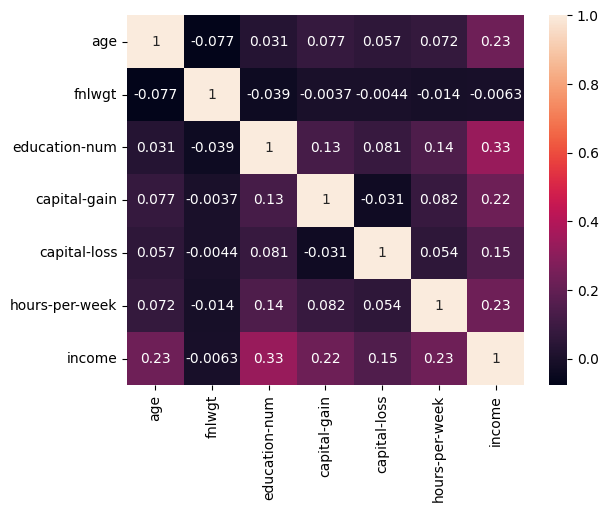

In [ ]:
sns.heatmap(numeric_data.corr(),annot=True)

A partir dos histogramas abaixo, é possível obter um panorama geral da população americana de 1994, como em questões de idade, escolaridade e padrão de jornada de trabalho. Fora isso, percebe-se também que uma parcela pouco significativa da população realizava investimentos, o que pode ser observado a partir da pequena porcentagem de indivíduos tanto que ganharam, quanto perderam dinheiro a partir disso.

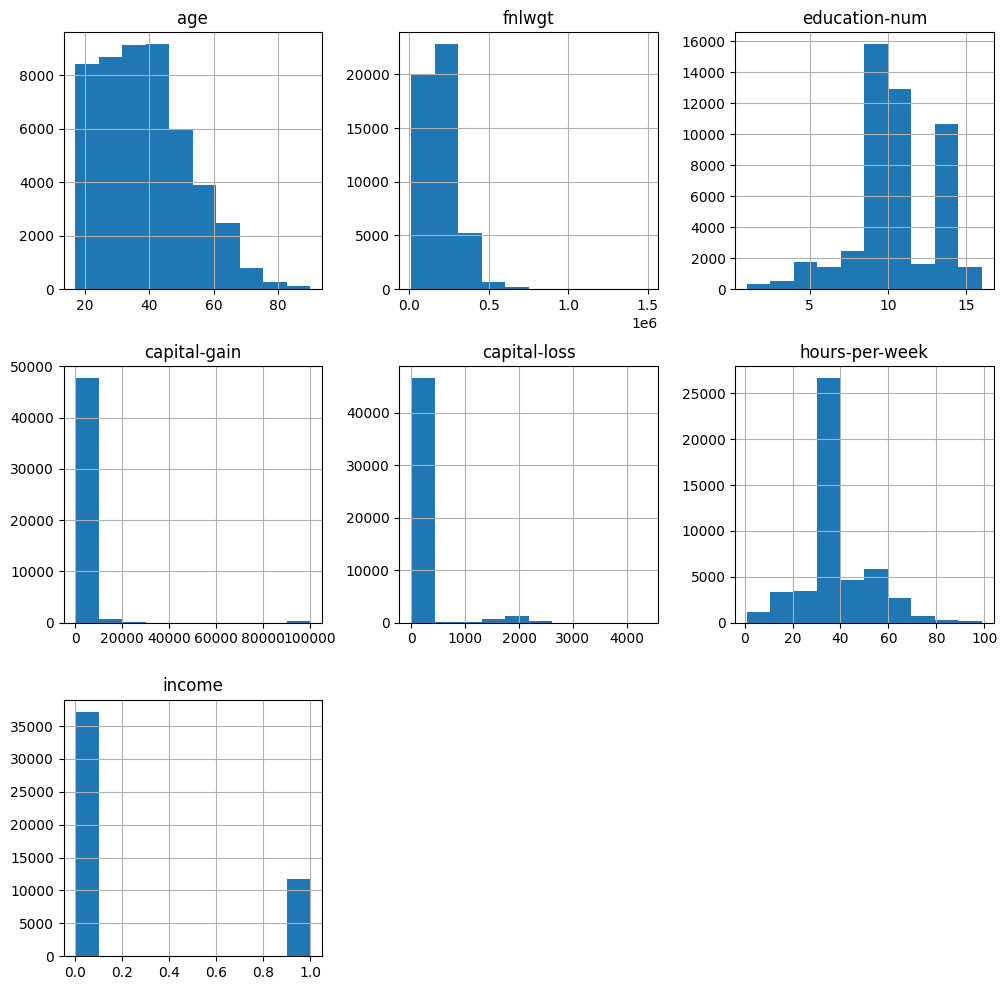

In [ ]:
numeric_data.hist(figsize=(12,12),layout=(3,3),sharex=False);

### 2. Seleção de atributos

Inicialmente, são retirados os atributos irrelevantes ou redundantes. Logo percebe-se que os atributos **education** e **education-num** representam o mesmo tipo de dado, sendo equivalentes. Isso pode ser compreendido a partir do gráfico abaixo, que os associa. Nota-se que cada categoria nominal tem uma correspondência clara e consistente com os valores numéricos, sem intersecções, indicando que cada valor possui seu correspondente direto e os atributos são equivalentes. O segundo (education-num) representa de forma numérica e ordinal os níveis de escolaridade indicados, de forma nominal, em education. Dessa forma, tem-se que education-num adiciona mais informação ao conjunto, conseguindo representar a ideia de ordem entre os possíveis valores que o atributo pode possuir. Além disso, ao utilizar atributos numéricos, facilita-se a aplicação de operações matemáticas e estatísticas fundamentais para o aprendizado de máquina. Com isso, define-se que o atributo **education** será removido do conjunto sem perda de informação.


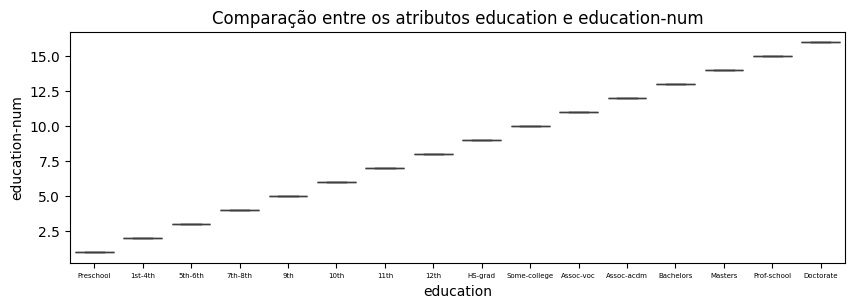

In [ ]:
plt.figure(figsize=(10, 3))
order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
sns.boxplot(x='education', y='education-num', data=data, order=order)
plt.title('Comparação entre os atributos education e education-num')
plt.xticks(fontsize=5)
plt.show()

Ao analisar um atributo **fnlwgt**, foram notadas razões para considerar a remoção do mesmo do dataset. São apresentados a seguir o gráfico e as estatísticas que as evidenciam.

Como mencionado anteriormente, há baixa correlação entre tal atributo e o alvo, o que pode indicar pouca utilidade dele no treinamento do modelo. Ademais, percebe-se que os valores do atributo são altamente dispersos. Esta alta variabilidade pode dificultar a modelagem e a interpretação dos resultados, pois pode introduzir ruído significativo nos modelos preditivos.
Percebe-se também uma extensa quantidade de valores únicos, que pode levar a problemas de dimensionalidade, onde a complexidade do modelo aumenta sem uma melhora proporcional no desempenho.

Principalmente, pelo gráfico boxplot é possível perceber a presença significativa de outliers. Esses outliers podem distorcer as análises e os modelos, influenciando negativamente as estimativas e previsões.
No entanto, os outliers são maiores que os valores médios, indicando que estes são os indivíduos com maior representatividade, consequentemente, mais importantes. Assim, por conter informações valiosas, esses valores extremos, se retirados do conjunto de dados, acarretariam grande perda de informação.

Considerando estes aspectos, sugere-se que a retirada do atributo é uma decisão justificável, visto que ele acarretaria mais riscos à robustez do modelo do que adição de informações relevantes, além de melhorar sua performance geral.

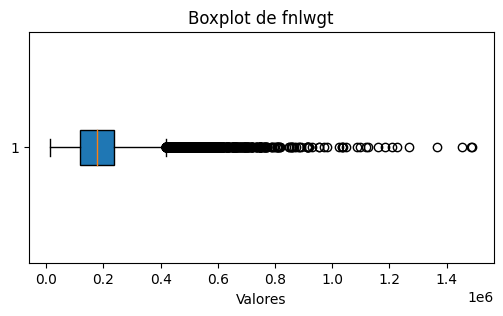

Média: 189664.13459727284
Mediana: 178144.5
Variância: 11152210185.574848
Desvio Padrão: 105604.02542315728
Amplitude: 1478115
Q1 (1º Quartil): 117550.5
Q3 (3º Quartil): 237642.0
Amplitude Interquartil (IQR): 120091.5
Coeficiente de Variação (CV): 0.5567949135317213
Mínimo:  12285
Máximo:  1490400
Quantidade de valores únicos:  28523


In [ ]:
# Boxplot
plt.figure(figsize=(6, 3))
plt.boxplot(data['fnlwgt'], vert=False, patch_artist=True)

plt.title('Boxplot de fnlwgt')
plt.xlabel('Valores')

mean_value = np.mean(data['fnlwgt'])
median_value = np.median(data['fnlwgt'])

plt.show()

# Estatísticas
mean = data['fnlwgt'].mean()
median = data['fnlwgt'].median()
variance = data['fnlwgt'].var()
std_dev = data['fnlwgt'].std()
range_value = data['fnlwgt'].max() - data['fnlwgt'].min()
Q1 = data['fnlwgt'].quantile(0.25)
Q3 = data['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
cv = std_dev / mean

# Resultados
print(f"Média: {mean}")
print(f"Mediana: {median}")
print(f"Variância: {variance}")
print(f"Desvio Padrão: {std_dev}")
print(f"Amplitude: {range_value}")
print(f"Q1 (1º Quartil): {Q1}")
print(f"Q3 (3º Quartil): {Q3}")
print(f"Amplitude Interquartil (IQR): {IQR}")
print(f"Coeficiente de Variação (CV): {cv}")
print(f"Mínimo: ", data['fnlwgt'].min())
print(f"Máximo: ", data['fnlwgt'].max())
print(f"Quantidade de valores únicos: ", data['fnlwgt'].nunique())

Em seguida, foram buscados atributos nominais com grande variedade de valores, que poderiam dificultar a classificação sem adicionar valor significativo ao modelo. No entanto, o único que apresentou problemas em relação a isso foi **native-country**, que, por suas características semânticas, será tratado e explicado posteriormente, sem necessidade de remoção.

Dessa forma, foram apenas retirados do conjunto de dados os atributos **education** e **fnlwgt**.

In [ ]:
unique = nominal_data.nunique()
unique

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
native-country    42
dtype: int64

In [ ]:
data = data.drop(columns=['education', 'fnlwgt'])
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 3. Tratamento de tuplas vazias e duplicadas

Inicialmente, são retiradas todas as tuplas reconhecidas como duplicadas, visto que não adicionam informação ao conjunto.

In [ ]:
print(data.duplicated().sum())
data = data.drop_duplicates()

4487


Em seguida, como é possível notar, existem alguns valores vazios no dataset. Devido ao fato da quantidade total ser relativamente pequena em relação ao total (cerca de 2%), optou-se por retirar tais tuplas. Essa abordagem foi escolhida para evitar qualquer distorção nos dados que poderia surgir ao utilizar métodos para completar valores ausentes. Ao remover essas tuplas, garantimos que o restante do conjunto de dados permanece o mais próximo possível da realidade observada, preservando a integridade dos dados e reduz o potencial de viés introduzido por imputações arbitrárias.

É importante notar que os valores vazios nos atributos **workclass** e **occupation** aconteciam, em sua maioria, nas mesmas tuplas. Desta forma, apesar do valor total de 2020 nulos, apenas 1229 tuplas foram efetivamente removidas nesta fase.

In [ ]:
data.isna().sum()

age                 0
workclass         872
education-num       0
marital-status      0
occupation        875
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    273
income              0
dtype: int64

In [ ]:
len_before = len(data)
data = data.dropna()
len_after = len(data)

print("Quantidade de linhas removidas: ", len_before - len_after)

Quantidade de linhas removidas:  1129


Em seguida, também foi notada considerável quantidade de valores '?' nos atributos **workclass**, **occupation** e **native-country** (mesmos atributos que possuíam valores vazios). Isso pode ter acontecido devido a uma falha na coleta de tais dados e posteriores problemas de codificação, representando os valores ausentes de diferentes maneiras (NaN, NA, None e "?"). Assim, por se tratar novamente de uma quantidade de valores que, se removida, não acarretará grande perda de dados, optou-se por apenas excluir tais tuplas.

Assim, apesar da possibilidade de imputar os dados nas classes majoritárias (dado que são significantemente mais robustas que as demais), foi tomada a decisão de não correr os riscos mencionados anteriormente, visto que o tamanho do conjunto de dados não será fortemente afetado.

In [ ]:
k = data[data.apply(lambda row: any(row == '?'), axis=1)]
print("Atributos que possuem '?': ", k.columns[k.isin(['?']).any()])

print("\nQuantidade total de valores '?': ", data[data.apply(lambda row: any(row == '?'), axis=1)].shape[0])

Atributos que possuem '?':  Index(['workclass', 'occupation', 'native-country'], dtype='object')

Quantidade total de valores '?':  2192


In [ ]:
data = data.replace('?', pd.NA)
data = data.dropna()

print("Formato dos dados após remoção de tuplas e atributos: ", data.shape)

Formato dos dados após remoção de tuplas e atributos:  (41034, 13)


Neste ponto, notou-se também a existência de valores redundantes no atributo alvo, onde as 2 classes existentes eram duplicadas com uma nova versão finalizada com ponto final. Isso pode ser observado a seguir, assim como sua resolução. Optou-se por antecipar o passo seguinte (tratamento dos atributos nominais) e aproveitar a substituição de valores para já transformar os valores nominais por numéricos (0, para "<=50K" e 1, para ">50K"), adequando-se ao padrão dos modelos.

In [ ]:
data['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
data['income'] = data['income'].apply(lambda x: 0 if x in ['<=50K', '<=50K.'] else 1)

### 4. Tratamento e seleção de atributos nominais

Dentre os atributos nominais, é importante considerar ajustes específicos em relação à variável **native-country**, que indica o país de origem. Apesar da grande variedade de valores possíveis, é notável que o valor majoritário (Estados Unidos) é muito mais representativo do que a soma das demais nacionalidades. Diante disso, optamos por separar os indivíduos entre americanos e imigrantes. Essa distinção se mostra importante, sobretudo considerando a disparidade em relação às nacionalidades menos representadas no contexto da análise de renda dos indivíduos e contextos de preconceito associado à obtenção de empregos no país.

In [ ]:
data['native-country'] = data['native-country'].apply(lambda x: 1 if x == 'United-States' else 0)

Em seguida, os demais atributos nominais foram transformados em numéricos (binários) para melhor adequação aos modelos que serão aplicados. Assim, foi aplicada a codificação One-Hot, onde cada valor único da variável é transformado em uma nova variável binária. Cada nova variável representa a presença ou ausência desse valor na observação original.

Essa abordagem vai criar uma matriz esparsa com muitas colunas binárias. Neste ponto, foi considerado gerar agrupamentos semânticos entre os possíveis valores de alguns atributos para diminuir o custo computacional da matriz e não aumentar desnecessariamente a dimensionalidade. No entanto, dois dos atributos que possuíam maior variedade de valores (**education-num** e **native-country**) foram transformados em numéricos, descartando tal necessidade.

O outro atributo com maior variedade (**occupation**), no entanto, não foi agrupado. Esta decisão se deu pela diferença considerável nas distribuições que poderiam ser consideradas semanticamente agrupáveis, o que poderia modificar os dados e gerar resultados falsos. No gráfico percebe-se como as categorias com distribuição similar não estão semanticamente associadas.

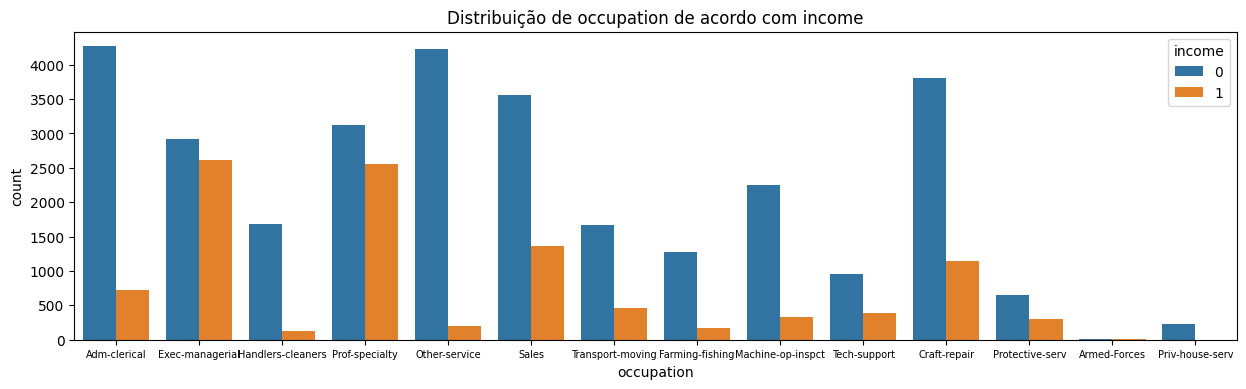

In [ ]:
# gráfico de barras empilhadas
plt.figure(figsize=(15, 4))
sns.countplot(data=data, x='occupation', hue='income')
plt.title('Distribuição de occupation de acordo com income')
plt.xlabel('occupation')
plt.xticks(fontsize=7)
plt.show()

Neste ponto, pôde-se enfim aplicar a técnica e deixar todos os dados, finalmente, numéricos.

In [ ]:
# especificando as colunas alvo da transformação
target_columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

# usando a função get_dummies
data_encoded_columns = pd.get_dummies(data[target_columns], drop_first=True, dtype=int)

# concatenando as novas colunas binárias na tabela e removendo as nominais originais
data = pd.concat([data.drop(columns=target_columns), data_encoded_columns], axis=1)

In [ ]:
print("Formato dos dados após tratamento dos atributos nominais: ", data.shape)

Formato dos dados após tratamento dos atributos nominais:  (41034, 42)


### 5. Tratamento de atributos numéricos

Em relação aos atributos numéricos, **capital-gain** e **capital-loss** (que indicam ganho ou perda de dinheiro através de investimentos) chamam atenção inicialmente, pois a maior parte dos seus valores é 0. Assim, a decisão tomada foi por reduzir tais dados em "nunca investiu" (ambos capital-gain e capital-loss são 0), "investiu e teve ganhos" (capital-gain é maior que 0) e "investiu e teve perdas" (capital-loss é maior que 0). Para eles, serão atribuídos os números 0, 0.5 e 1, respectivamente. Vale ressaltar que não há intersecções onde o indivídio teve capital-gain e capital-loss maior que 0, visto que o valor resultante é a diferença de ambos.

In [ ]:
data['investment_status'] = data.apply(lambda row: 0 if row['capital-gain'] == 0 and row['capital-loss'] == 0 else (0.5 if row['capital-gain'] > 0 else 1), axis=1)
data = data.drop(columns = ['capital-gain', 'capital-loss'])

Em seguida, iniciou-se a normalização dos demais dados numéricos. O objetivo é impedir que atributos com valores maiores dominem aqueles com valores menores nos cálculos dos modelos, reduzir a influência de outliers e facilitar a comparação entre os atributos durante a aplicação dos modelos.

No entanto, antes de realizar tal etapa, foram analisadas as distribuições dos atributos **hours-per-week** e **education-num**, como se segue.

No primeiro, percebeu-se a frequência significantemente maior de 40h de trabalho semanais. Esse tipo de fato pode acarretar principalmente em problemas de generalização se não tratados. Isso se dá pois o modelo aprende a prever o valor dominante, ignorando ou subestimando os valores menos frequentes. Assim, a decisão tomada foi por agrupar valores menos frequentes em categorias mais gerais, aumentando a representatividade de cada grupo. Assim, considerando que 40 horas é a quantidade padrão de horas trabalhadas por semana e reconhecendo que trabalhar mais de 40 horas é mais significativo para a renda do que trabalhar menos, decidimos criar três grupos distintos para melhor representar esses dados: menos de 40 horas (<40h), exatamente 40 horas (=40h), e mais de 40 horas (>40h). Atribuímos os valores 0, 0.5 e 1 a esses grupos, respectivamente, para refletir sua importância relativa e facilitar a análise. É exibida em seguida o novo histograma do atributo, onde percebe-se que os valores estão melhor distribuídos.

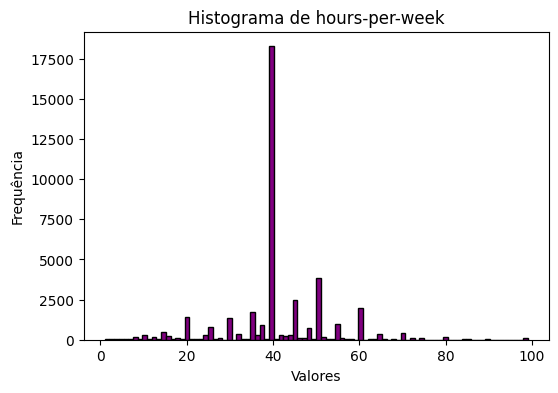

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['hours-per-week'], bins=90, color='purple', edgecolor='black')

plt.title('Histograma de hours-per-week')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()

In [ ]:
data_before = data.copy()
data['hours-per-week'] = data.apply(lambda row: 0 if row['hours-per-week'] < 40 else (0.5 if row['hours-per-week'] == 40 else 1), axis=1)

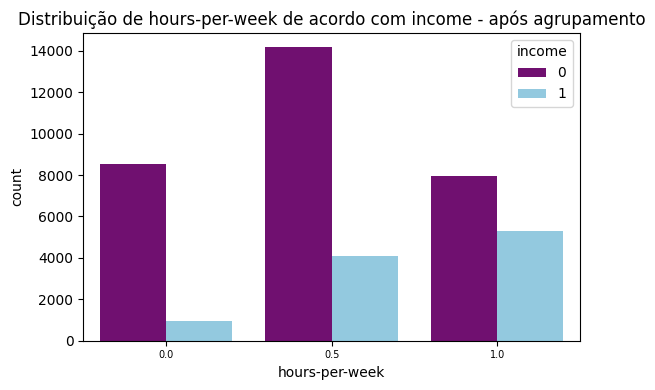

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='hours-per-week', hue='income', palette=["purple", "skyblue"])
plt.title('Distribuição de hours-per-week de acordo com income - após agrupamento')
plt.xlabel('hours-per-week')
plt.xticks(fontsize=7)

plt.tight_layout()
plt.show()

Em relação ao atributo **education-num**, há uma questão similar a ser tratada. Os valores de 9 e 10 são muito mais significativos que os demais até 8, podendo causar os mesmos problemas de generalização. Assim, optou-se também por realizar agrupamento: entre os valores 1 a 8 que, semanticamente, voltando ao atributo categórico **education**, se tratariam dos níveis de escolaridade que contemplam o ensino fundamental. Desta forma, mantém-se a coerência dos dados, ajustando-os para fornecer melhores resultados.

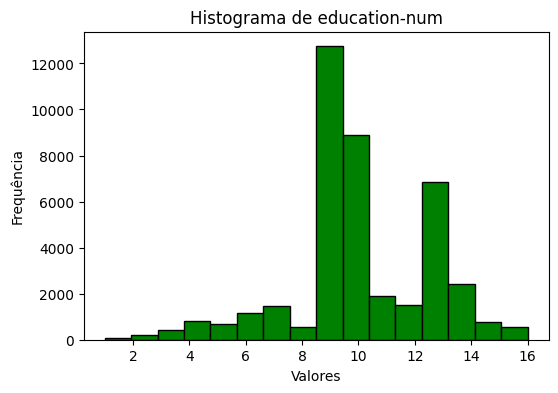

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['education-num'], bins=16, color='green', edgecolor='black')
plt.title('Histograma de education-num')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

In [ ]:
data['education-num'] = data['education-num'].apply(lambda x: 8 if x <= 8 else x)

O atributo **age**, por sua vez, pôde ser normalizado sem problemas, visto que sua distribuição aproxima-se da distribuição Gaussiana e não possui agravantes que devessem ser corrigidos.

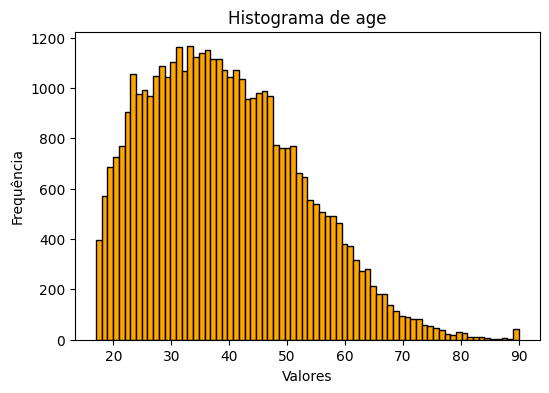

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(data['age'], bins=74, color='orange', edgecolor='black')

plt.title('Histograma de age')
plt.xlabel('Valores')
plt.ylabel('Frequência')

plt.show()

Assim, pôde-se finalmente normalizar entre 0 e 1 os atributos numéricos restantes. Para isso, escolheu-se a normalização Min-Max, visto que ela é capaz de manter a distribuição relativa dos dados e se mostra adequada e eficiente para dados que seguem uma distribuição uniforme, como é o caso. Por fim, é exibido o aspecto geral dos dados processados.

In [ ]:
scaler = MinMaxScaler()
data[['age', 'education-num', 'hours-per-week']] = scaler.fit_transform(data[['age', 'education-num', 'hours-per-week']])

In [ ]:
data

,age,education-num,hours-per-week,native-country,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,investment_status
0,0.301370,0.625,0.5,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0.5
1,0.452055,0.625,0.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0.0
2,0.287671,0.125,0.5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
3,0.493151,0.000,0.5,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0.0
4,0.150685,0.625,0.5,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0.219178,0.625,0.5,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0.0
48837,0.301370,0.625,0.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
48839,0.287671,0.625,1.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0.0
48840,0.369863,0.625,0.5,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0.5


### 6. Amostragem

O código abaixo ilustra a amostragem realizada para se ter um conjunto de treino e validação dos modelos. Nela, algumas escolhas foram feitas, considerando a natureza do dataset:

* **Amostragem holdout:** considerando que após todas operações de pré-processamento necessária restaram-se 41034 tuplas de dados no dataset, pode-se afirmar que existe uma quantidade de dados suficiente para que um bom treinamento e um bom conjunto de testes seja dividido para que se faça a validação dos dados contra overfit e má generalização. Além disso, o uso de cross-validation com tamanho dataset seria custoso, o que se evidenciaria com mais força com o posterior uso de técnicas de GridSearch para refino dos hiperparâmetros e aplicação de diferentes modelos. Assim, um holdout clássico simples com 80% dos dados para treino e 20% dos dados para validação foram usados.
* **GridSearchCV:** Outro fator a se considerar foi que a utilização do GridSearchCV, o qual testa exaustivamente diferentes modelos usando diferentes hiperparâmetros, utiliza internamente para comparação dos modelos a Cross-Validation com r folds definidos, de forma a retornar com mais confiabilidade um modelo bom, sem overfittings.
* **RandomizedSearchCV:** técnica de otimização de hiperparâmetros que busca aleatoriamente combinações de hiperparâmetros e avalia cada combinação usando validação cruzada. Ela é principalmente útil quando o espaço de busca é grande e a busca exaustiva (como GridSearchCV) seria computacionalmente custosa.
* **Amostragem estratificada:** Outra escolha feita foi a estratificação dos dados com base na coluna y target de "income". Isso foi feito considerando que existe um desequilíbrio entre a quantidade de tuplas pertencentes a cada uma das classes, sendo que os alvos com "income" menor ou igual a 50k tinha cerca de 37k valores, enquanto a classe "income" maior que 50k possuía cerca de 12k valores. Dessa forma, a estratificação por tal coluna garante uma representação proporcional dos dados nos conjuntos de treino e teste, mantendo a essência da população e evitando viés.

In [ ]:
y = data['income']
X = data.drop(columns='income')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Aplicação dos Métodos


Antes da aplicação dos modelos, foi definida uma função para utilização padronizada das métricas de desempenho. Nele, foi decidido por usar 3 medidas:
* **Acurácia**: por oferecer uma perspectiva geral da performance do modelo, indicando a proporção de previsões corretas.
* **Precisão**: avaliação da confiabilidade das previsões positivas, crucial quando os custos de um falso positivo são altos.
* **F1-score**: combinação das métricas precisão e recall (proporção de positivos reais identificados corretamente) em uma única métrica, fornecendo um equilíbrio entre ambos.

Além disso, foi exibida a matriz de confusão para posteriores análises visuais e intuitivas do resultado.

In [ ]:
# usar para validacoes de modelos
def evaluate(y_test, y_pred, model_name):

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  f1_sc = f1_score(y_test, y_pred)

  print(f'Classification Report for model {model_name}:\n\n', classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  cm_display = ConfusionMatrixDisplay(cm)

  cm_display.plot()
  plt.title(f'Confusion Matrix for model {model_name}')
  plt.show()

  return (acc, prec, f1_sc)

In [ ]:
# DF pra armazenar a acurácia de todos os modelos e depois comparar
result=pd.DataFrame(columns=['Model','Accuracy Score', 'Precision Score', 'F1-Score'])

###K-Nearest Neighboors (KNN)

O KNN foi utilizado como base de comparação para os demais métodos aplicados, tendo em vista que este se trata de um dos métodos mais simples e intuitivos para tarefas de classificação. Esse algortimo utiliza as distâncias entre as amostras: para uma nova amostra, o algoritmo calcula a distância euclidiana entre a amostra e todos os pontos de dados no conjunto de treinamento; com base nas distâncias calculadas, seleciona os K pontos de dados mais próximos;A nova amostra é classificada pela maioria dos rótulos dos K vizinhos mais próximos.
Primeiramente, utilizou-se apenas os valores default da função KNeighborsClassifier().


In [ ]:
knn_classifier = KNeighborsClassifier()

# Treinamento do modelo KNN com a busca de hiperparâmetros
knn_classifier.fit(X_train, y_train)

# Avalia o desempenho do melhor modelo no conjunto de teste
y_pred = knn_classifier.predict(X_test)

In [ ]:
print(len(y_test))
print(len(y_pred))

8207
8207


Classification Report for model KNN:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88      6129
           1       0.64      0.58      0.61      2078

    accuracy                           0.81      8207
   macro avg       0.75      0.73      0.74      8207
weighted avg       0.81      0.81      0.81      8207



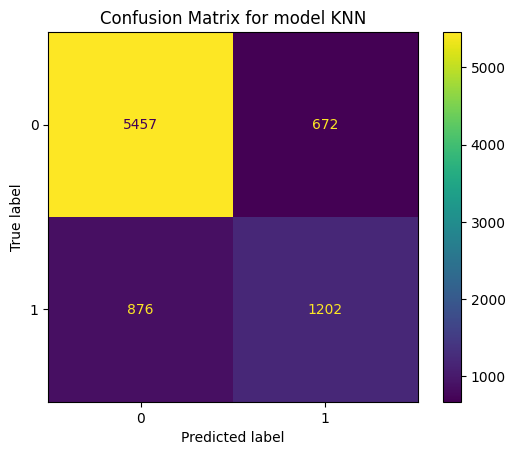

accuracy: 0.8113805288168636
precision: 0.6414087513340448
f1-score: 0.6082995951417004


In [ ]:
# Validação do Modelo
acc, prec, f1_sc = evaluate(y_test, y_pred, 'KNN')
result.loc[0] = ['KNN classifier', acc, prec, f1_sc]

print('accuracy:', acc)
print('precision:', prec)
print('f1-score:', f1_sc)

Em seguida, utilizou-se RandomizedSearchCV por se utilizar de um modelo mais custoso. Dessa forma, espera-se que a classficação seja otimizada, pois ela foi utilizado dentro de um leque de parâmetros oferecidos pela documentação do projeto.

(disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [ ]:
knn_classifier = KNeighborsClassifier()
#Definição dos Hiperparâmetros Base para teste
knn_hyperparameters = dict(n_neighbors = list(range(1,20)), # Variação do número de vizinhos
                           metric = ['minkowski'],
                           weights=['uniform','distance'],
                           algorithm=['auto'],
                           p=[1,2],
                           leaf_size=list(range(1,20)))

knn_classifier = RandomizedSearchCV(estimator=knn_classifier,
                                    param_distributions=knn_hyperparameters,
                                    cv=3,verbose=10)

# Treinamento do modelo KNN com a busca de hiperparâmetros
knn_classifier.fit(X_train, y_train)

# melhores modelo e hiperparâmetros encontrados
best_estimator = knn_classifier.best_estimator_
best_params = knn_classifier.best_params_

# Avalia o desempenho do melhor modelo no conjunto de teste
y_pred = best_estimator.predict(X_test)

print("Melhores parâmetros:", best_params)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START algorithm=auto, leaf_size=4, metric=minkowski, n_neighbors=1, p=1, weights=uniform
[CV 1/3; 1/10] END algorithm=auto, leaf_size=4, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.779 total time=  17.3s
[CV 2/3; 1/10] START algorithm=auto, leaf_size=4, metric=minkowski, n_neighbors=1, p=1, weights=uniform
[CV 2/3; 1/10] END algorithm=auto, leaf_size=4, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.776 total time=  14.4s
[CV 3/3; 1/10] START algorithm=auto, leaf_size=4, metric=minkowski, n_neighbors=1, p=1, weights=uniform
[CV 3/3; 1/10] END algorithm=auto, leaf_size=4, metric=minkowski, n_neighbors=1, p=1, weights=uniform;, score=0.781 total time=  17.0s
[CV 1/3; 2/10] START algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=uniform
[CV 1/3; 2/10] END algorithm=auto, leaf_size=7, metric=minkowski, n_neighbors=9, p=1, weights=uniform;, score=0.818 to

Classification Report for model KNN:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6129
           1       0.70      0.54      0.61      2078

    accuracy                           0.83      8207
   macro avg       0.78      0.73      0.75      8207
weighted avg       0.82      0.83      0.82      8207



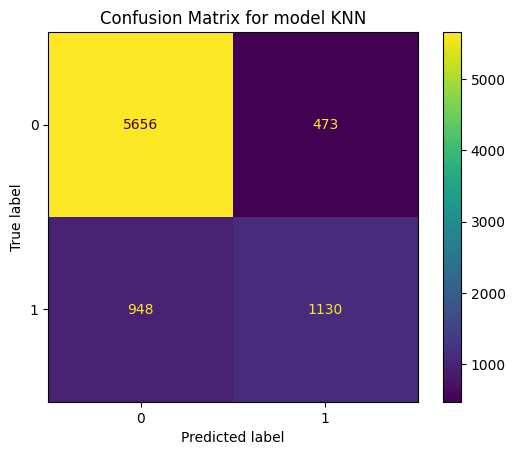

accuracy: 0.8268551236749117
precision: 0.7049282595134123
f1-score: 0.6139635968486823


In [ ]:
# Validação do Modelo
acc, prec, f1_sc = evaluate(y_test, y_pred, 'KNN')
result.loc[1] = ['KNN (Optimezed) classifier', acc, prec, f1_sc]

print('accuracy:', acc)
print('precision:', prec)
print('f1-score:', f1_sc)

### Xgboost (eXtreme Gradient Boosting)

O modelo xgboost foi escolhido para ser usado uma vez que é sabido de seu potencial em problemas de aprendizado supervisionado como classificação, em que seu desempenho se mostra melhor que outros modelos em muitos casos. Isso se deve ao boosting do modelo, que consiste na combinação de diversos modelos preditivos "fracos", sendo esses árvores de decisão, para construção de um modelo único preditivo forte.

Na aplicação demonstrada abaixo, conforme consulta das respectivas documentações do sklearn e do xgboost, usou-se o GridSearchCV para iterar sobre todas combinações possíveis de hiperparâmetros selecionados a partir de uma lista de valores possíveis escolhidos previamente. Para se ter melhor confiabilidade no resultado que determina o melhor modelo dentre as combinações geradas, usou-se cross-validation com 3 folds. O processo descrito é útil para refinar o modelo escolhendo hiperparâmetros que potencializem seu desempenho, ao custo de relativo alto custo computacional para teste de todas combinações possíveis


In [ ]:
xgb_estimator = XGBClassifier(random_state=41)

# distribuicao de parametros possiveis a serem escolhidos aleatoriamente em cada iteracao
param_grid = {
    "max_depth": range(2, 8, 2),
    "eta": [0.0, 0.3, 0.60, 0.75, 0.90],
    "gamma": [0.0, 4.0, 8.0, 10.0],  # Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

}

# cross validation com 3 folds
searcher = GridSearchCV(estimator=xgb_estimator, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# busca melhor modelo
searcher.fit(X_train, y_train)

# melhores modelo e hiperparâmetros encontrados
best_estimator = searcher.best_estimator_
best_params = searcher.best_params_

# Avalia o desempenho do melhor modelo no conjunto de teste
y_pred = best_estimator.predict(X_test)

print("Melhores parâmetros:", best_params)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Melhores parâmetros: {'eta': 0.3, 'gamma': 0.0, 'max_depth': 2}


Classification Report for model xgboost:

               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6129
           1       0.72      0.61      0.66      2078

    accuracy                           0.84      8207
   macro avg       0.80      0.77      0.78      8207
weighted avg       0.84      0.84      0.84      8207



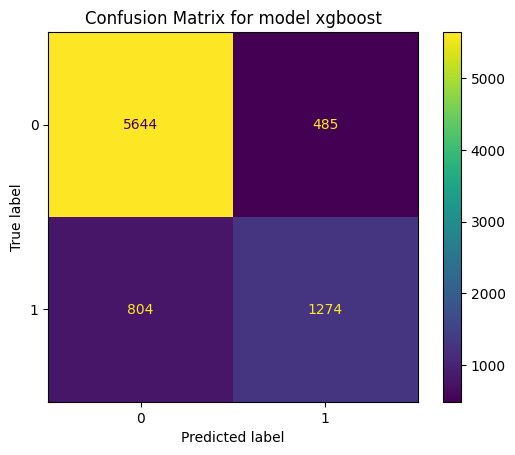

accuracy: 0.8429389545509931
precision: 0.7242751563388289
f1-score: 0.6640604639040917


In [ ]:
acc, prec, f1_sc = evaluate(y_test, y_pred, 'xgboost')
result.loc[2] = ['xgboost', acc, prec, f1_sc]

print('accuracy:', acc)
print('precision:', prec)
print('f1-score:', f1_sc)

### Decision Tree

Assuim como no método KNN, a árvore de decisão foi escolhido para esta tarefa de classificação devido à sua simplicidade e interpretabilidade. As árvores de decisão são amplamente utilizadas em problemas de aprendizado supervisionado, pois oferecem uma forma clara de visualizar o processo de tomada de decisão do modelo. Elas funcionam dividindo recursivamente o espaço de características em regiões que maximizam a separação das classes (tendo em vista os métodos de avaliação de divisão), criando um modelo fácil de interpretar que pode lidar tanto com variáveis categóricas quanto contínuas.

Os dois métodos para avaliação de divisão das classes são:
- Gini: Mede a impureza de um nó. Um nó é puro se todas as amostras pertencem à mesma classe.
- Entropia (ou ganho de informação): Mede a quantidade de desordem ou imprevisibilidade em um nó.



In [ ]:
# Inicializando o classificador por árvore de decisão
DTree_classifier = DecisionTreeClassifier()

# Definindo os hiperparâmetros a serem otimizados
DTree_hyperparameters = {
    'max_depth': list(range(1, 20)),         # máxima da árvore
    'min_samples_split': list(range(2, 20)), # número mínimo de amostras para dividir um nó
    'min_samples_leaf': list(range(1, 20)),  # número mínimo de amostras em um nó folha
    'criterion': ['gini', 'entropy']
}

# Hiperparâmetros
DTree_classifier = RandomizedSearchCV(estimator=DTree_classifier,
                                                       param_distributions=DTree_hyperparameters,
                                                       cv=3,verbose=10, n_iter=50)

# Treinamento
DTree_classifier.fit(X_train, y_train)

# melhores modelo e hiperparâmetros encontrados
best_estimator = DTree_classifier.best_estimator_
best_params = DTree_classifier.best_params_

# Avalia o desempenho do melhor modelo no conjunto de teste
y_pred = best_estimator.predict(X_test)

print("Melhores parâmetros:", best_params)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3; 1/50] START criterion=entropy, max_depth=14, min_samples_leaf=11, min_samples_split=16
[CV 1/3; 1/50] END criterion=entropy, max_depth=14, min_samples_leaf=11, min_samples_split=16;, score=0.827 total time=   0.1s
[CV 2/3; 1/50] START criterion=entropy, max_depth=14, min_samples_leaf=11, min_samples_split=16
[CV 2/3; 1/50] END criterion=entropy, max_depth=14, min_samples_leaf=11, min_samples_split=16;, score=0.823 total time=   0.1s
[CV 3/3; 1/50] START criterion=entropy, max_depth=14, min_samples_leaf=11, min_samples_split=16
[CV 3/3; 1/50] END criterion=entropy, max_depth=14, min_samples_leaf=11, min_samples_split=16;, score=0.830 total time=   0.1s
[CV 1/3; 2/50] START criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=18
[CV 1/3; 2/50] END criterion=entropy, max_depth=7, min_samples_leaf=15, min_samples_split=18;, score=0.825 total time=   0.1s
[CV 2/3; 2/50] START criterion=entropy, max_dept

Classification Report for model KNN:

               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6129
           1       0.70      0.57      0.63      2078

    accuracy                           0.83      8207
   macro avg       0.78      0.74      0.76      8207
weighted avg       0.82      0.83      0.82      8207



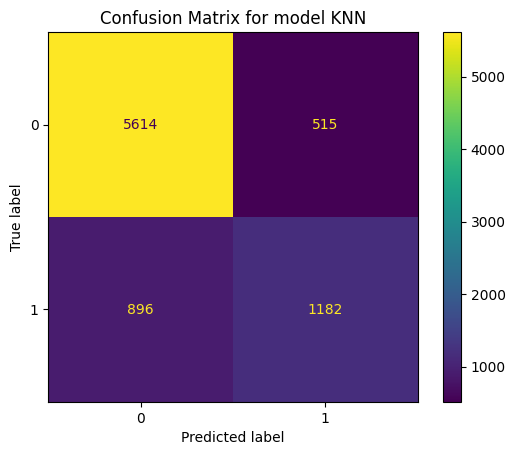

accuracy: 0.8280735957109784
precision: 0.6965232763700648
f1-score: 0.6262251655629139


In [ ]:
# Validação do Modelo
acc, prec, f1_sc = evaluate(y_test, y_pred, 'KNN')
result.loc[3] = ['DTree Classifier', acc, prec, f1_sc]

print('accuracy:', acc)
print('precision:', prec)
print('f1-score:', f1_sc)

### Random Forest

O modelo random forest também foi selecionado para uso. Seguindo o uso de algoritmos que utilizam árvores de decisão, o random forest RandomForestClassifier do scikit-learn baseia-se em árvores independentes treinadas em amostras aleatórias, capturando diferentes aspectos dos dados e reduzindo os efeitos de variância através do processo de agregação. Devido à tal natureza do método, ele é menos suscetível a overfitting em comparação com uma única árvore de decisão.

Fora isso, demais motivos que levaram à escolha de seu uso foram a eficiência em lidar com matrizes esparsas (advindas da cofidicação One-Hot utilizada) e pela possibilidade de capturar relações não lineares nos dados, tornando-a adequada para o caso das relações entre variáveis não serem simplesmente lineares e não estar claro quais são os atributos mais relevantes. Por fim, as random forest também são consideradas escolhas sólidas para conjuntos de dados de tamanho moderado, como é o caso.

Para encontrar as melhores combinações de hiperparâmetros, foi novamente utilizado o RandomizedSearchCV, explicado previamente.

In [ ]:
rf_classifier = RandomForestClassifier()

# hiperparâmetros que podem ser escolhidos

criterion=['gini','entropy']
max_depth = list(range(10,100,10))
min_samples_leaf=[1,2,4]
min_samples_split=[2,5,10]
max_features = ['auto','sqrt']
bootstrap=[True,False]

rf_hyperparams = dict(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf,
                          min_samples_split=min_samples_split,max_features=max_features,bootstrap=bootstrap)

# aplicando busca pelos melhores hiperparâmetros (cross-validation)

rf_gridsearch = RandomizedSearchCV(estimator=rf_classifier,param_distributions=rf_hyperparams,cv=3,verbose=10)

# ajustando aos dados de treinamento

rf_gridsearch.fit(X_train,y_train)

# melhores modelo e hiperparâmetros encontrados
best_estimator = rf_gridsearch.best_estimator_
best_params = rf_gridsearch.best_params_

# Avalia o desempenho do melhor modelo no conjunto de teste
y_pred = best_estimator.predict(X_test)

# melhores hiperparâmetros encontrados

print("Melhores parâmetros:", rf_gridsearch.best_params_)

# realizando a predição

rf_y_predict = rf_gridsearch.predict(X_test)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10
[CV 1/3; 1/10] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.841 total time=   2.3s
[CV 2/3; 1/10] START bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10
[CV 2/3; 1/10] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.837 total time=   1.9s
[CV 3/3; 1/10] START bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10
[CV 3/3; 1/10] END bootstrap=True, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10;, score=0.834 total time=   1.8s
[CV 1/3; 2/10] START bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt

Classification Report for model randomforest:

               precision    recall  f1-score   support

           0       0.86      0.93      0.90      6129
           1       0.73      0.57      0.64      2078

    accuracy                           0.84      8207
   macro avg       0.80      0.75      0.77      8207
weighted avg       0.83      0.84      0.83      8207



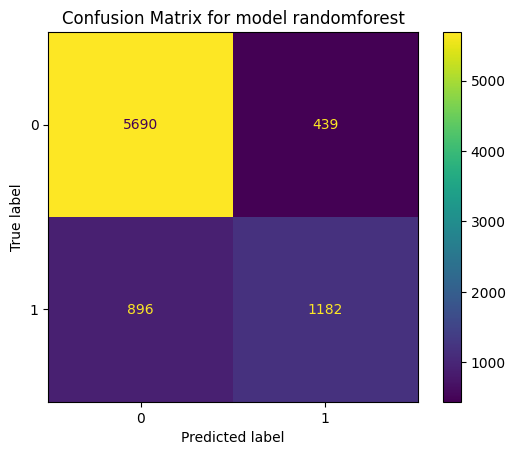

accuracy: 0.8373339831850859
precision: 0.729179518815546
f1-score: 0.6390916463909164


In [ ]:
acc, prec, f1_sc = evaluate(y_test, y_pred, 'randomforest')
result.loc[4] = ['randomforest', acc, prec, f1_sc]

print('accuracy:', acc)
print('precision:', prec)
print('f1-score:', f1_sc)

Por fim, vale também mencionar os motivos que fizeram com que os métodos de Bayes e SVC fossem deixados de lado nesta análise. Bayes se mostra mais adequado para problemas simples e com alta dimensionalidade, como a classificação de texto, o que não é o caso do problema. Fora isso, ele assume independência entre as características, que pode não ser completamente realista dado o heatmap de correlações inicial. Já o SVC é útil para problemas de alta dimensionalidade com margens claras de separação, o que tabém não pode ser dito a respeito do problema em questão, fora seu alto custo.

Os métodos escolhidos já foram capazes de encontrar resultados satisfatórios e mostra-se a não-necessidade de utilizar métodos tão mais complexos para o problema em questão.

## Conclusão dos Resultados




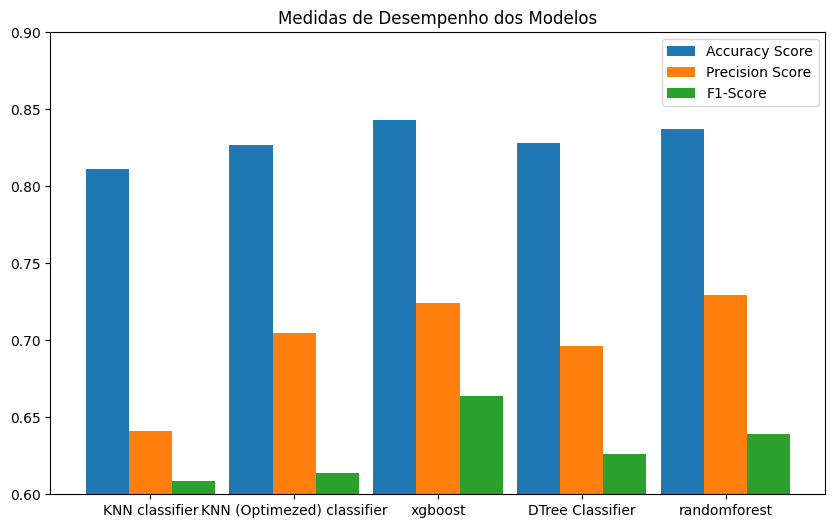

In [ ]:
# Configurações do gráfico
x = np.arange(len(result['Model']))  # posições no eixo x
width = 0.3  # largura das barras

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando as barras
bar1 = ax.bar(x - width, result['Accuracy Score'], width, label='Accuracy Score')
bar2 = ax.bar(x, result['Precision Score'], width, label='Precision Score')
bar3 = ax.bar(x + width, result['F1-Score'], width, label='F1-Score')

# Configurando o limite do eixo y
ax.set_ylim(0.6, 0.9)

# Adicionando os rótulos e título
ax.set_title('Medidas de Desempenho dos Modelos')
ax.set_xticks(x)
ax.set_xticklabels(result['Model'])
ax.legend()

# Exibindo o gráfico
plt.show()

In [ ]:
result

,Model,Accuracy Score,Precision Score,F1-Score
0,KNN classifier,0.811381,0.641409,0.608300
1,KNN (Optimezed) classifier,0.826855,0.704928,0.613964
2,xgboost,0.842939,0.724275,0.664060
3,DTree Classifier,0.828074,0.696523,0.626225
4,randomforest,0.837334,0.729180,0.639092


A partir das etapas realizadas e dos resultados acima, pode-se concluir que:

* o dataset precisou de pré-processamento complexo, como é de se esperar pela natureza do problema;
* observou-se correlação entre **age**, **education** e **income** que, ao ser investigado, pode trazer insights sobre o problema, dentre eles que, maiores nível de escolaridade e idades mais avançadas são mais comuns em pessoas que ganham acima de $50K/ano, o que faz sentido e é esperado;
* o modelo que obteve os melhores resultados foi **xgboost**, como era de se esperar por se tratar de um modelo consistente, mostrando, na prática, melhor eficiência que os demais;
* todos modelos tiveram desempenho satisfatório e relativamente próximos considerando a natureza complexa do problema;
* baseado nas métricas de desempenho, percebeu-se também que não houve overfit, visto que os modelos apresentam resultados razoáveis;
* a acurácia se mostrou enganosa, visto que, ao calcular o F1-score, mais balanceado, este mostrou-se consideravelmente menor;
* foi provado na prática que refinar os hiperparâmetros melhora o desempenho do modelo, uma vez que a aplicação do modelo KNN sem tal ajuste teve desempenho menor que o com ajuste;
* o fato de algoritmos mais simples como KNN e árvores de decisão terem desempenhos bons e semelhantes a algoritmos mais complexos como xgboost mostra que não se faz necessário o uso de algoritmos tão complexos para obter boas classificações, o que geraria desperdícios de recursos e possibilidade de overfit.


### **Referências**

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

Géron, Aurélien. Mãos à obra: Aprendizado de máquina com Scikit-Learn, Keras e TensorFlow: Conceitos, ferramentas e técnicas para construir sistemas inteligentes. 2ª ed. Sebastopol, CA: O'Reilly Media, Inc., 2019. 856 páginas. ISBN 978-1-4920-3261-8.

Slides de Aula - Aprendizado de Máquina 1

https://medium.com/@keler.yohan/como-refinar-os-hiper-par%C3%A2metros-de-um-modelo-xgboost-em-python-a096f6ca8f14
